<a href="https://colab.research.google.com/github/umeshbudhori/Bike-Sharing-Demand-Prediction/blob/main/my_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# mounting the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing the dataset
df=pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData (3).csv',encoding = "ISO-8859-1")

# Exploratory data analysis 


In [ ]:
# Check shape of dataset
df.shape

(8760, 14)

In [ ]:
# Checking first 10 rows in dataset
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Checking last 10 rows in dataset
df.tail(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Check the columns in the dataframe
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Exploring descriptive statistical parameter
df.describe()    

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# checking the total number of null values in every column
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

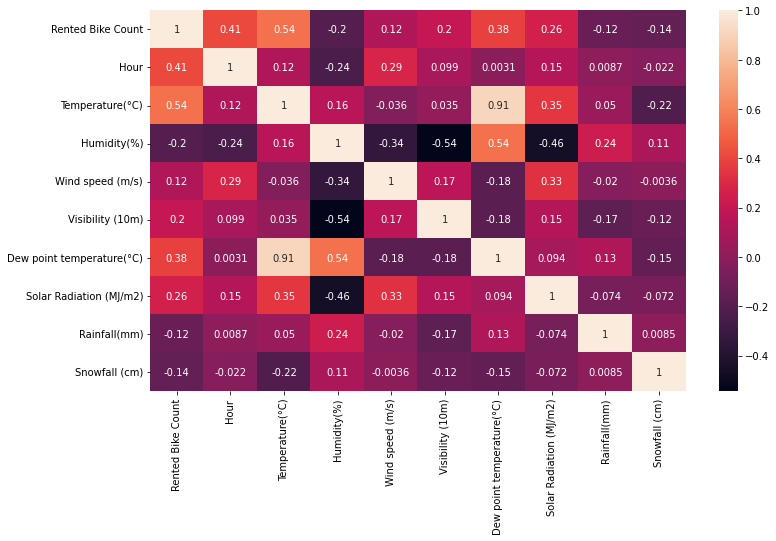

In [ ]:
#checking correlation using heatmap
plt.rcParams['figure.figsize']=(12,7)
sns.heatmap(df.corr(),  annot=True)

In [ ]:
# Removing multicollinearity by using variance inflation factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
# Calculating VIF for each dependent variable
calc_vif(df[[i for i in df.describe().columns if i not in ['Dew point temperature(°C)'] ]])

,variables,VIF
0,Rented Bike Count,4.079409
1,Hour,4.666421
2,Temperature(°C),4.461586
3,Humidity(%),5.064468
4,Wind speed (m/s),4.615473
5,Visibility (10m),4.842512
6,Solar Radiation (MJ/m2),2.255230
7,Rainfall(mm),1.103319
8,Snowfall (cm),1.120752


In [ ]:
# Date columns to Date format conversion
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
# Extracting day,month,year from date column

df['Year']=pd.DatetimeIndex(df['Date']).year
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Day']=pd.DatetimeIndex(df['Date']).day
df.drop(columns=['Date'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int64

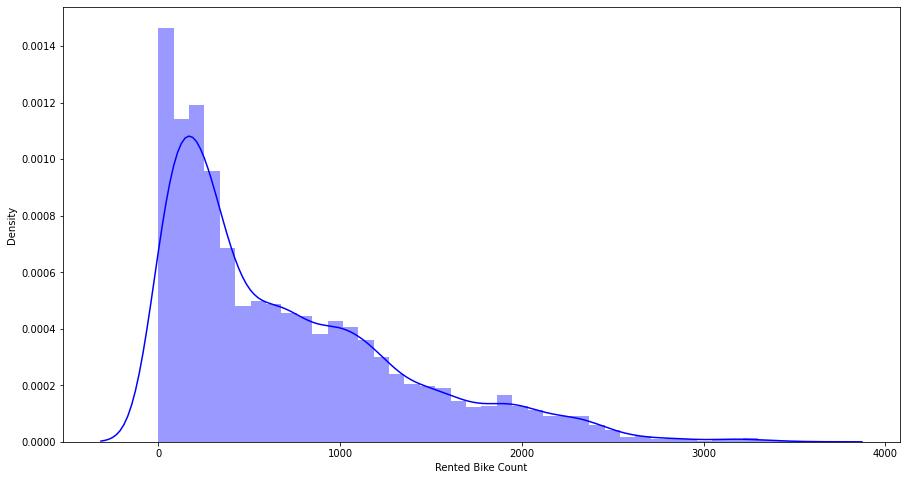

In [ ]:
#visualising distribution

plt.figure(figsize=(15,8))
sns.distplot((df['Rented Bike Count']),color="b")

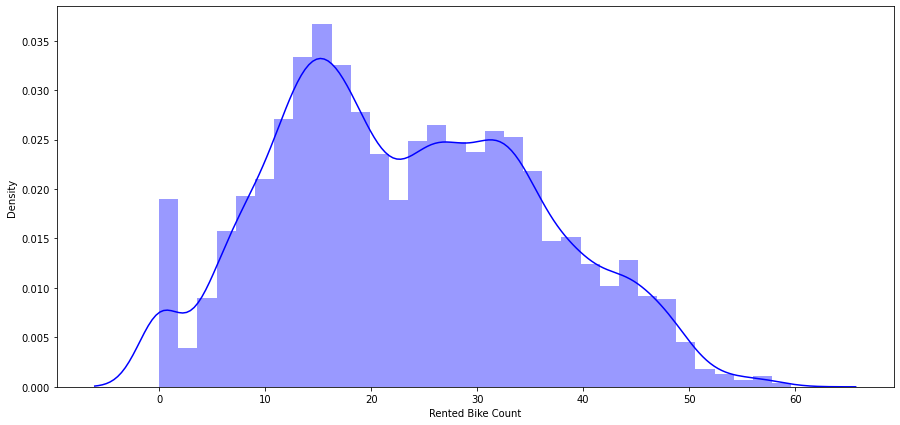

In [ ]:
# square_root transformation
plt.figure(figsize=(15,7))
sns.distplot(np.sqrt(df['Rented Bike Count']),color="b")

In [ ]:
# Numeric Features

numeric_features= df.select_dtypes(exclude='object')

In [ ]:
# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Year                       8760 non-null   int64  
 11  Month                      8760 non-null   int64  
 12  Day                        8760 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 889.8 KB


In [ ]:
# describing numeric feature

numeric_features.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2017.915068,6.526027,15.720548
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.278796,3.448048,8.796749
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018.000000,4.000000,8.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018.000000,7.000000,16.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018.000000,10.000000,23.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018.000000,12.000000,31.000000


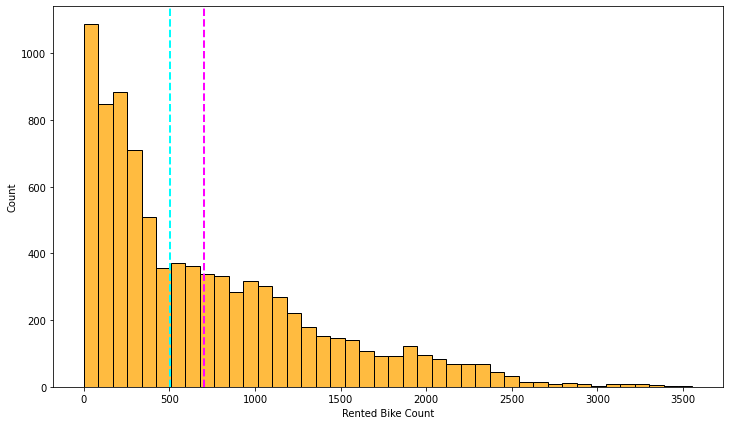

<Figure size 1440x576 with 0 Axes>

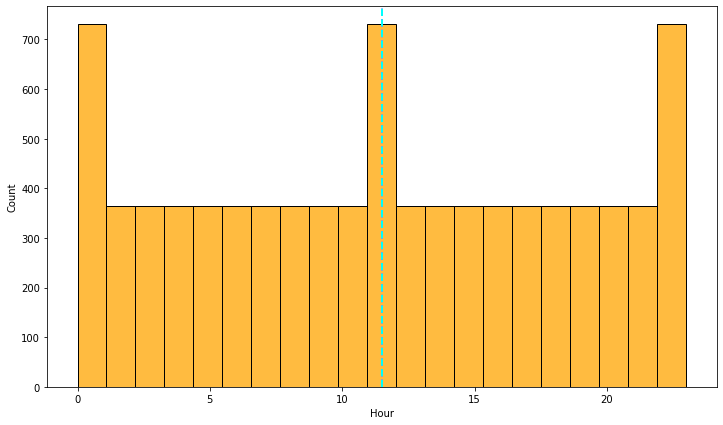

<Figure size 1440x576 with 0 Axes>

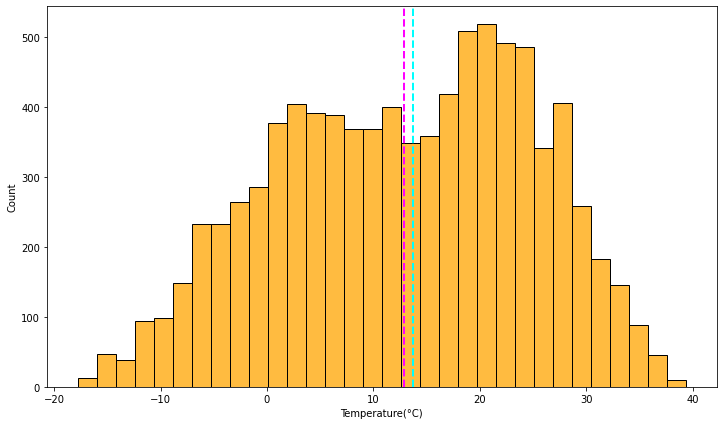

<Figure size 1440x576 with 0 Axes>

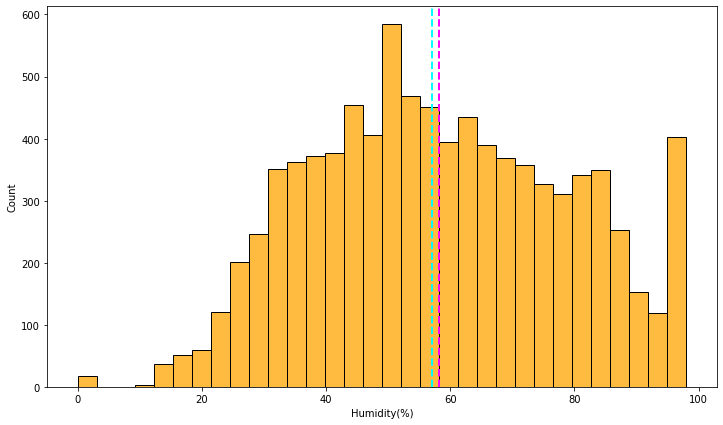

<Figure size 1440x576 with 0 Axes>

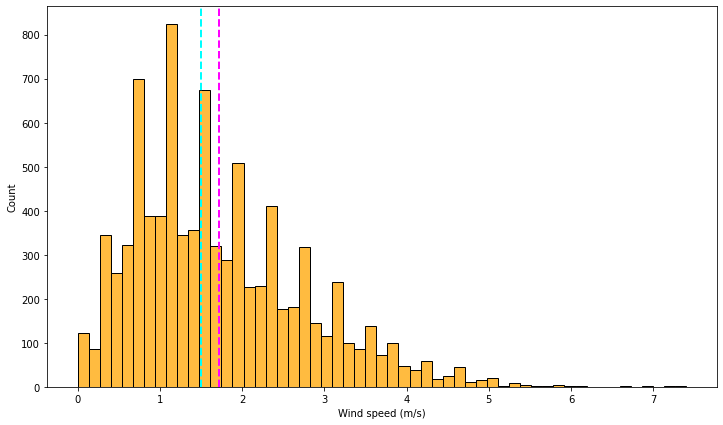

<Figure size 1440x576 with 0 Axes>

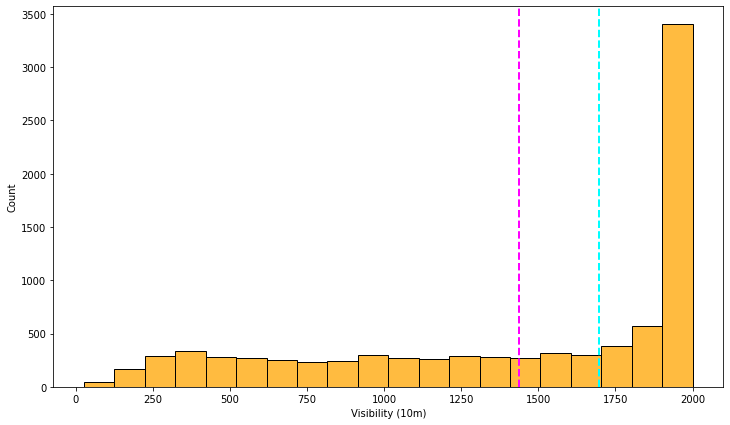

<Figure size 1440x576 with 0 Axes>

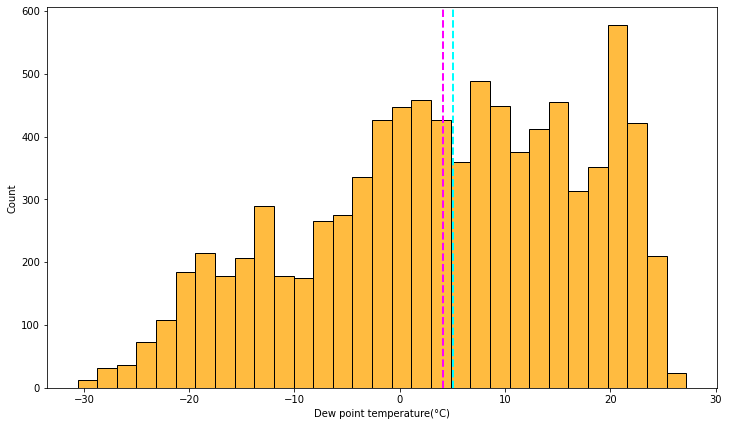

<Figure size 1440x576 with 0 Axes>

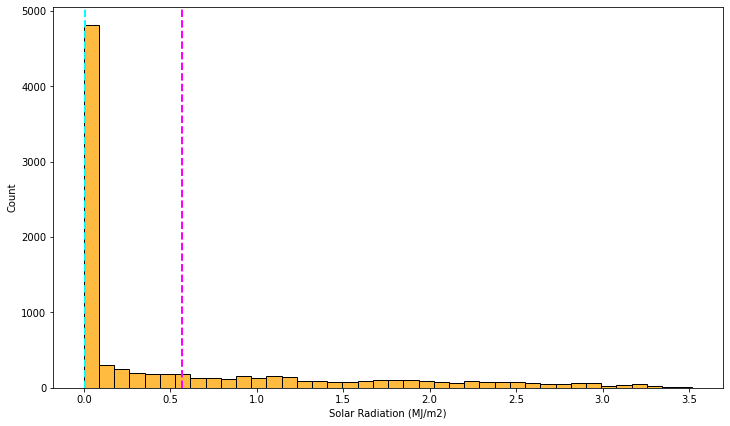

<Figure size 1440x576 with 0 Axes>

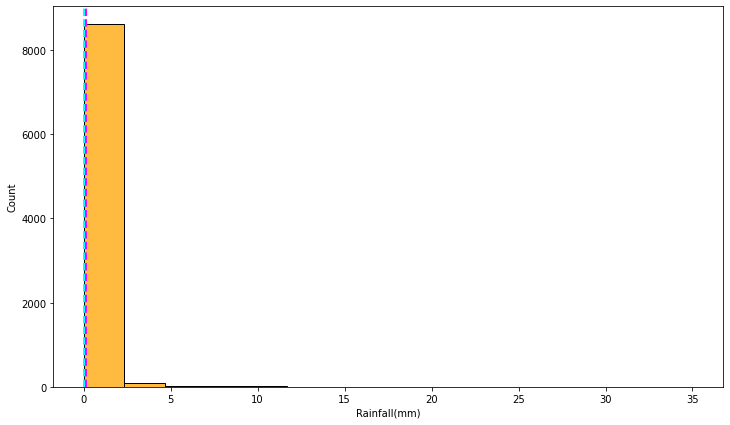

<Figure size 1440x576 with 0 Axes>

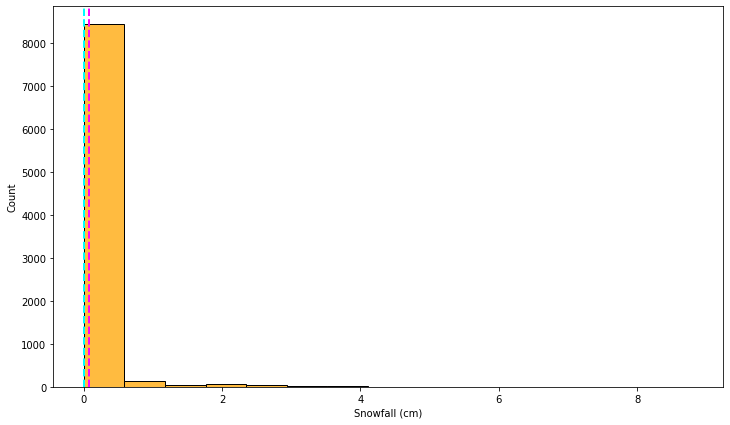

<Figure size 1440x576 with 0 Axes>

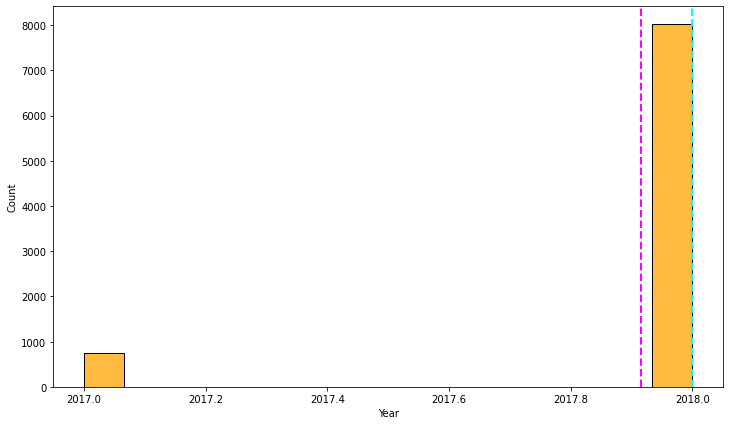

<Figure size 1440x576 with 0 Axes>

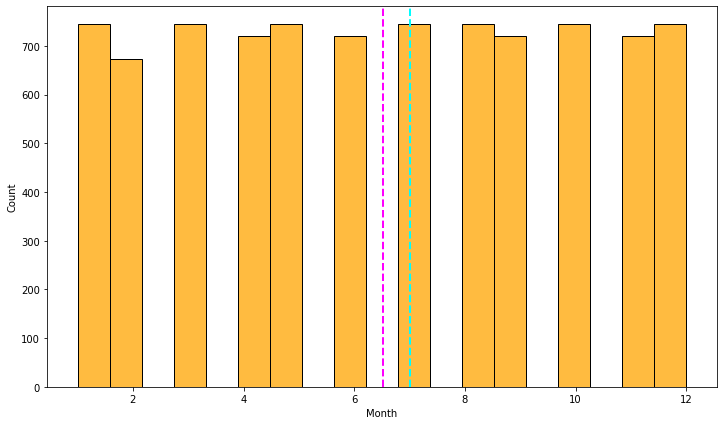

<Figure size 1440x576 with 0 Axes>

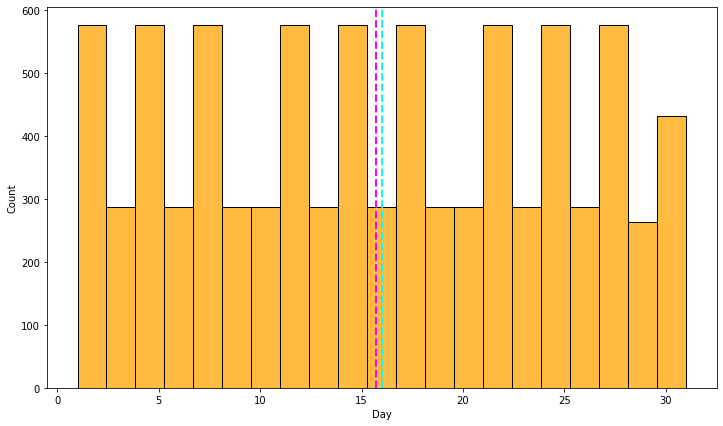

<Figure size 1440x576 with 0 Axes>

In [ ]:
#plotting histogram
for col in numeric_features[:]:
  sns.histplot(df[col],color = 'orange')
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)  
  plt.figure(figsize=(20,8))
  plt.show()

<Figure size 864x360 with 0 Axes>

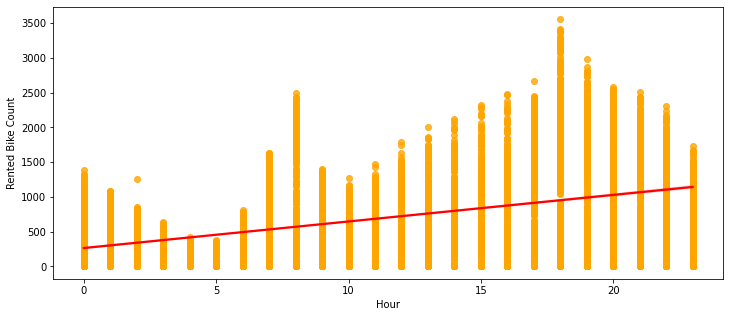

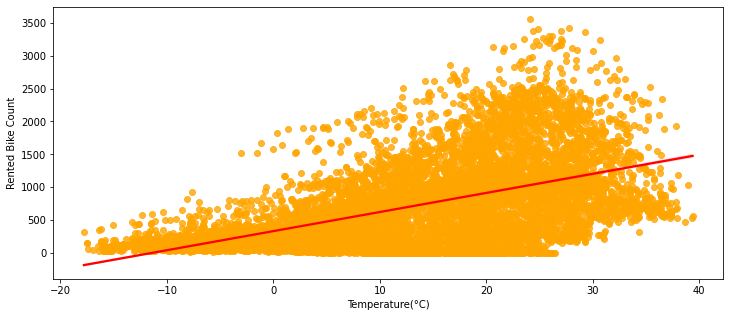

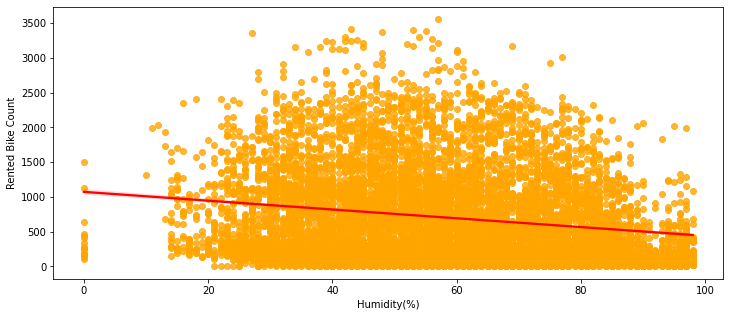

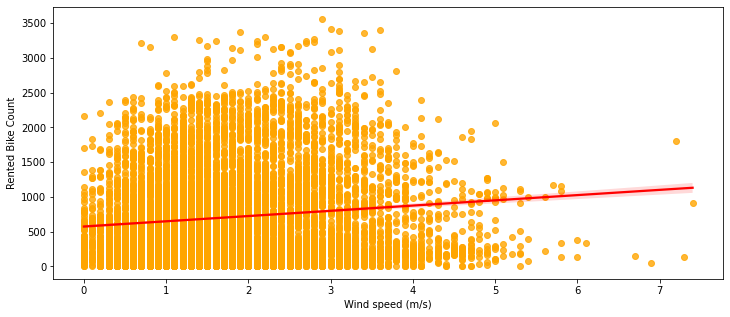

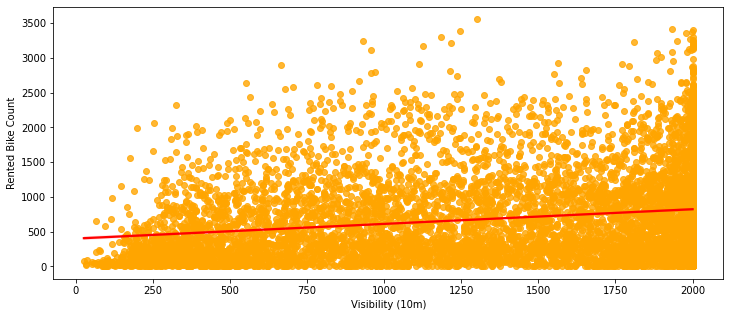

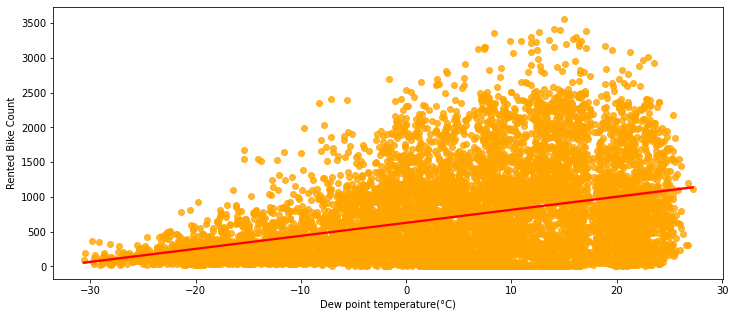

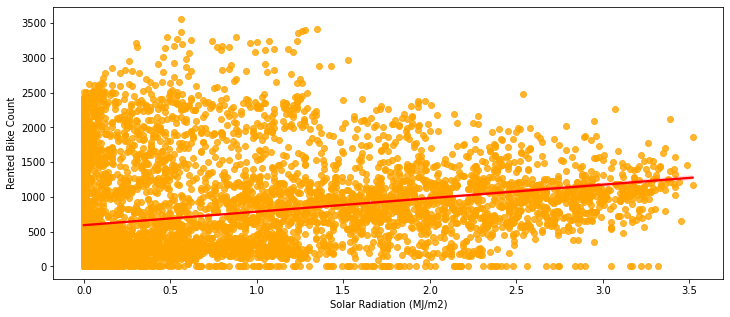

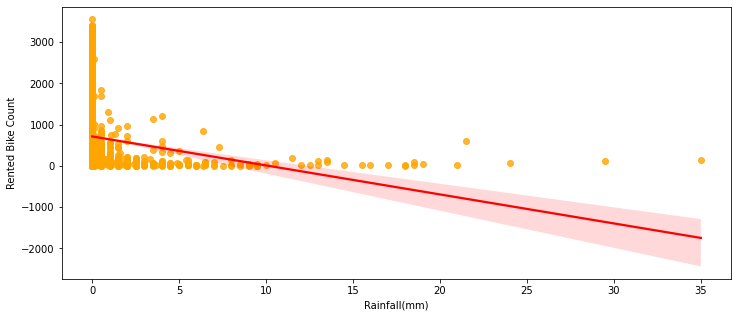

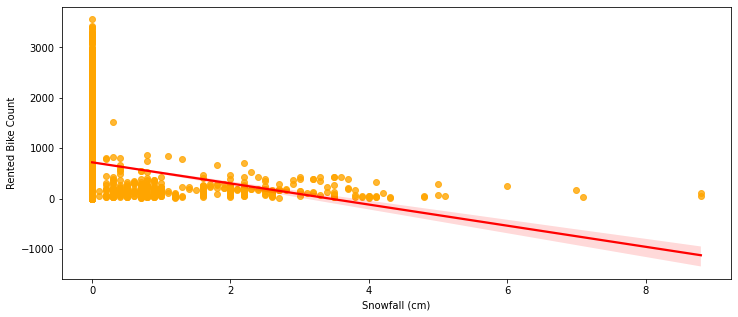

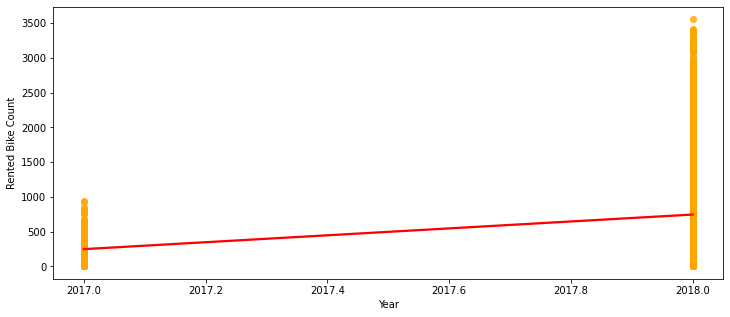

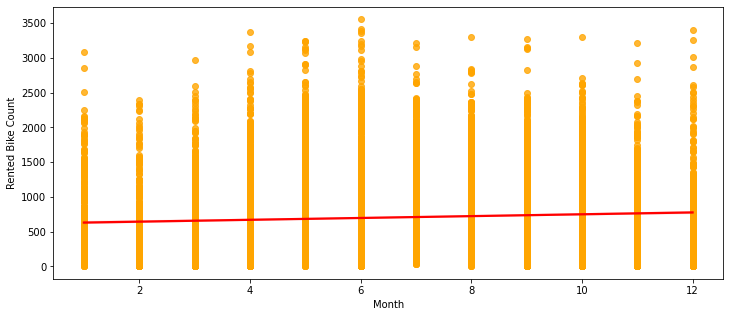

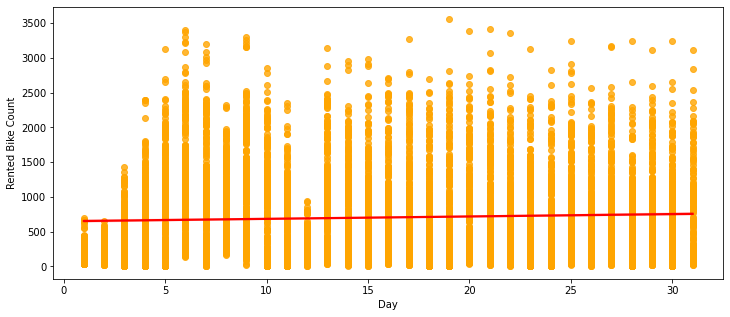

In [ ]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in numeric_features[:]:
  plt.figure(figsize=(12,5))
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],color = 'orange',y=df["Rented Bike Count"],line_kws={"color": "red"})
  plt.show()

In [ ]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')

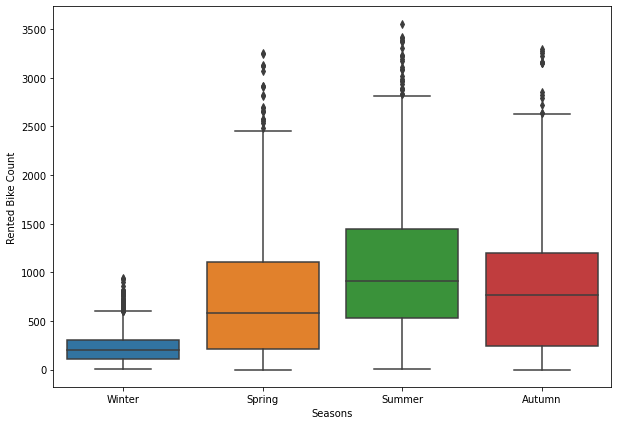

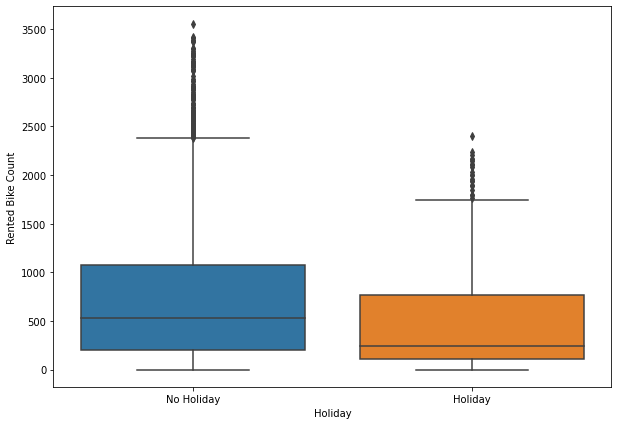

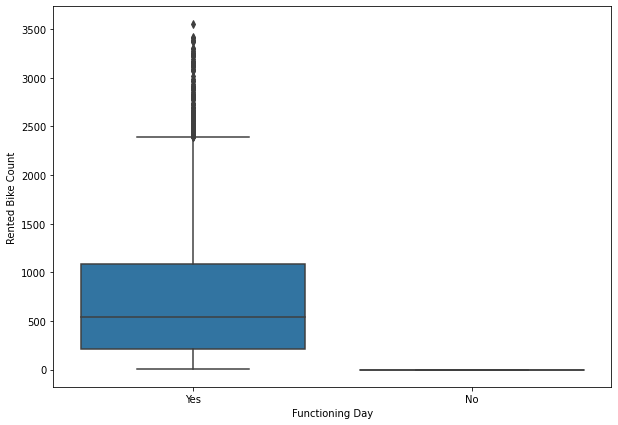

In [ ]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,7))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()
  

 Conclusion
- Less demand on winter seasons
- Sligthly Higher demand during Non holidays
- Almost no demnad on non functioning day 

In [ ]:
#checking counts of functioning day
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

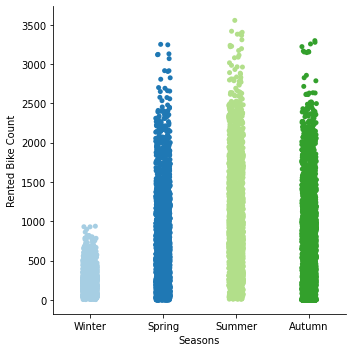

In [ ]:
#ploting cat plot for more info
sns.catplot(x='Seasons',y='Rented Bike Count',data=df, palette = ("Paired") )


# **Explore our categorical feature and Trying to take some important information from the categorical**

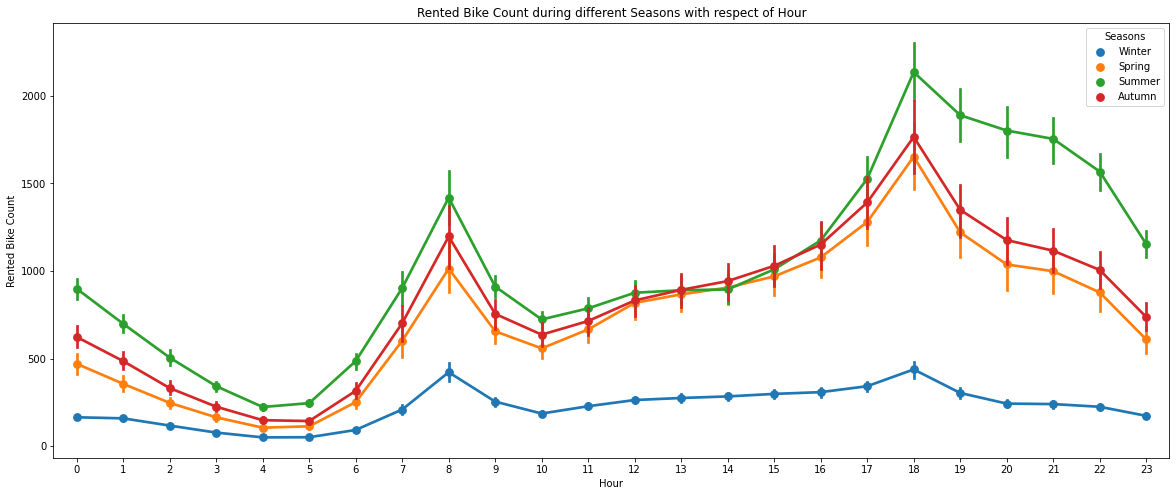

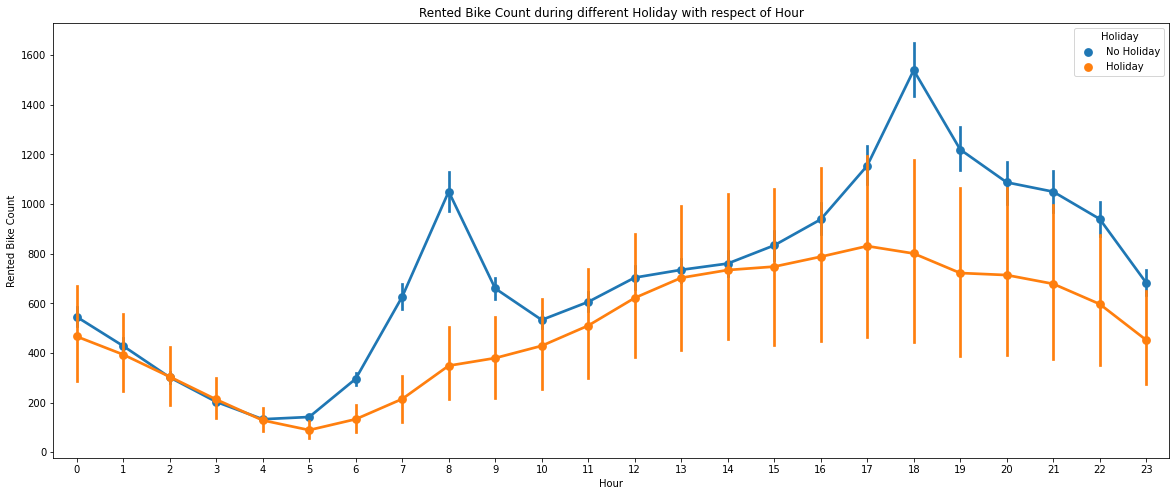

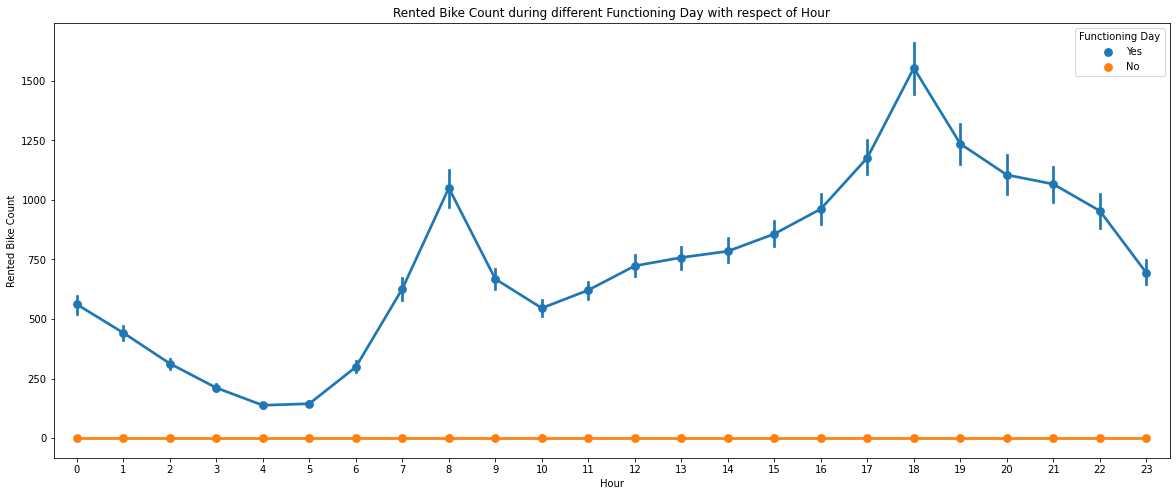

In [ ]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,8))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

# Observation
From all these pointplot we have observed a lot from every column like :

# Season
In the season column, we are able to understand that the demand is low in the winter season.
# New section
Holiday
In the Holiday column, The demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work.

# Functioning Day
In the Functioning Day column, If there is no Functioning Day then there is no demand

# **Conclusion**

**we can clearly see that there is less demand of rented bike during winter season**

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23')]

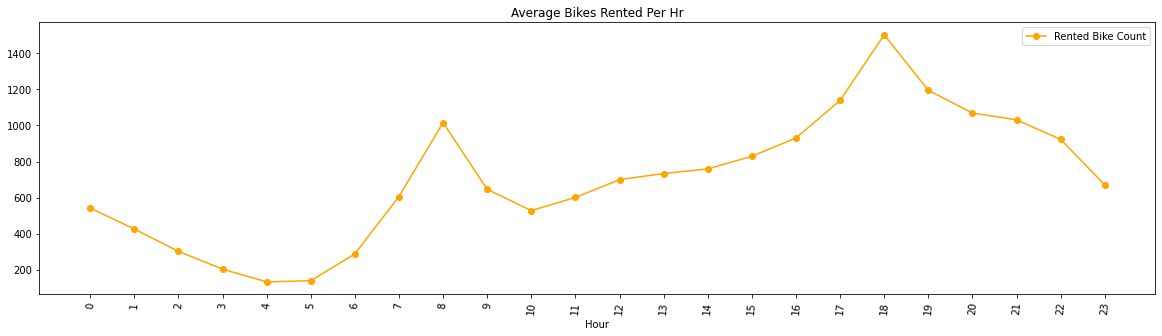

In [ ]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()
# plot average rent over time(hrs)
plt.figure(figsize=(20,5))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr",color ="orange")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

# **Conclusion**

- High rise of Rented Bikes from 8:00 a.m to 9:00 p.m
     means people prefer rented bike during rush hour.



- we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand





In [ ]:
# Create dummy variables for the catgeorical variable 
df['Winter'] = np.where(df['Seasons']=='Winter', 1, 0)
df['Autumn'] = np.where(df['Seasons']=='Autumn', 1, 0)
df['Spring'] = np.where(df['Seasons']=='Spring', 1, 0)
df['Summer'] = np.where(df['Seasons']=='Summer', 1, 0)

df['Functioning Day'] = df['Functioning Day'].replace(to_replace = ['Yes','No'],value = ['1','0'])
df['Holiday'] = df['Holiday'].replace(to_replace = ['Holiday','No Holiday'],value = ['1','0'])

# Drop the original column from the dataset
df.drop(columns=['Seasons','Dew point temperature(°C)'],axis=1,inplace=True)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Month,Day,Winter,Autumn,Spring,Summer
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,2017,1,12,1,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,2017,1,12,1,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,2017,1,12,1,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,2017,1,12,1,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,2017,1,12,1,0,0,0


In [ ]:
#describing DF
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Winter,Autumn,Spring,Summer
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068,2017.915068,6.526027,15.720548,0.246575,0.249315,0.252055,0.252055
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746,0.278796,3.448048,8.796749,0.431042,0.432641,0.434217,0.434217
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000,2018.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000,2018.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,1.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000,2018.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 10400x6000 with 0 Axes>

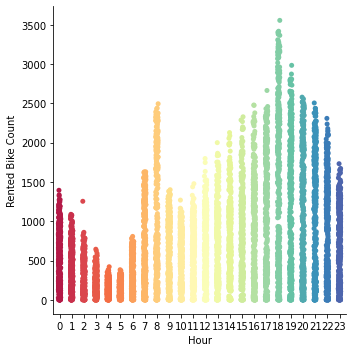

<Figure size 10400x6000 with 0 Axes>

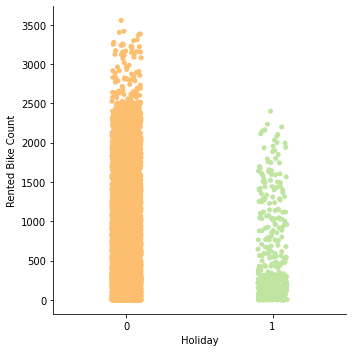

<Figure size 10400x6000 with 0 Axes>

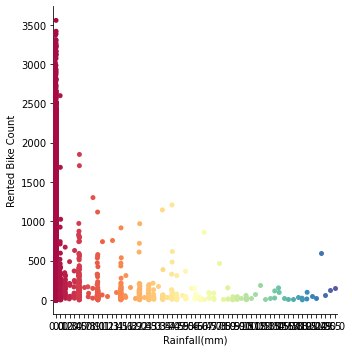

<Figure size 10400x6000 with 0 Axes>

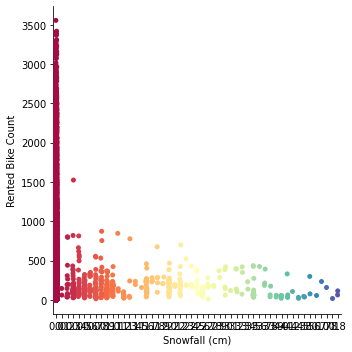

In [ ]:
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall(mm)','Snowfall (cm)']
for feature in feature_list:
  plt.figure(figsize=(52,30),dpi=200)
  sns.catplot(x=feature,y='Rented Bike Count',data=df, palette = ("Spectral"))
  plt.show()

Conclusion:

**From hour v/s rented bike**
- we can clearly see there is high demand of Rented bike between the office hours.

**From working-nonworking v/s rented bike**

- As cleared from 2nd plot working days has comparatively high demand of rented bike as compared to non working day

**From Rainfall v/s rented bike**

- we can see that if Rainfall increase demand of Rented Bike Decreases


**From Snowfall v/s rented bike**

- we can see that if Snowfall increase demand of Rented Bike Decreases

# **Conclusion:**

- we can see that there less demand of Rented bike in the month of December, january, February i.e during winter seasons

- Also demand of bike is maximum during May, june, july i.e Summer seasons

# Functions

## Creating Function to train linear models and calculate scores

---



In [ ]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [ ]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values 
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

## creating function to run diffirent models

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)


    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

## creating function to get feature importance 

In [ ]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,8))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()


# Train | Test Split for Linear Regression

In [ ]:

dependent_variable = 'Rented Bike Count'
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [ ]:
# Create the data of independent variables
X = df[independent_variables].values

# Create the dependent variable data
y = np.sqrt(df[dependent_variable].values)

In [ ]:
X.shape

(8760, 17)

In [ ]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
#scaling data
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Linear Regresseion

In [ ]:
#linear regression model

linear_model= LinearRegression()

MSE : 175979.63556073912
RMSE : 419.49926765220835
R2 : 0.574198775978514
Adjusted R2 :  0.5700242541743819


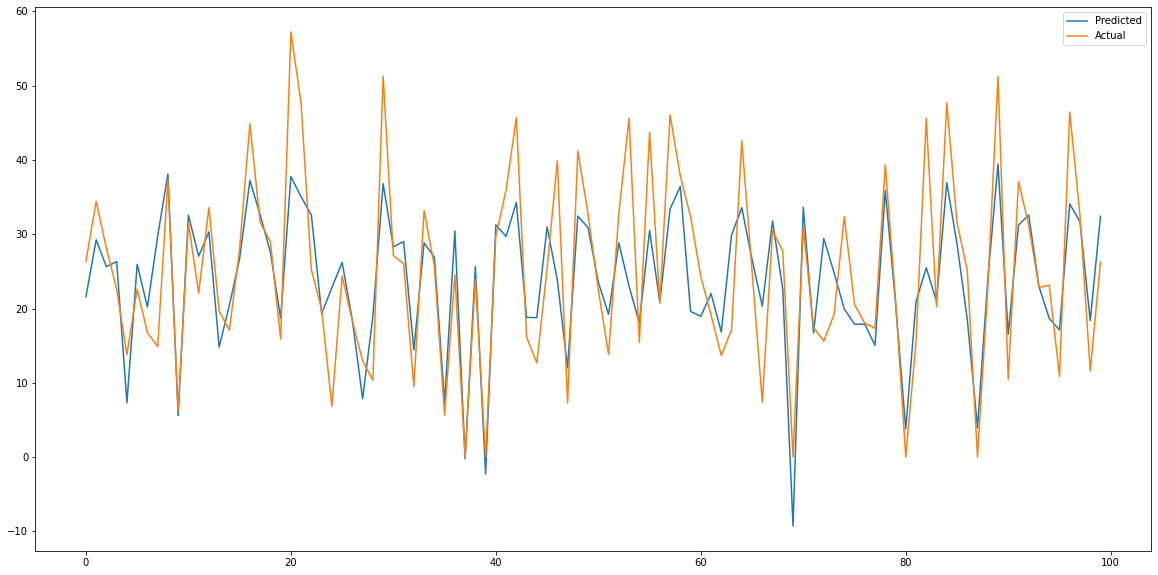

In [ ]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

# Regularisation

In [ ]:
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)

In [ ]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

##Ridge Regression

In [ ]:
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

In [ ]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

## ElasticNet Regression

In [ ]:
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

MSE : 175773.20746074623
RMSE : 419.2531543837759
R2 : 0.5746982504624185
Adjusted R2 :  0.570528625466952


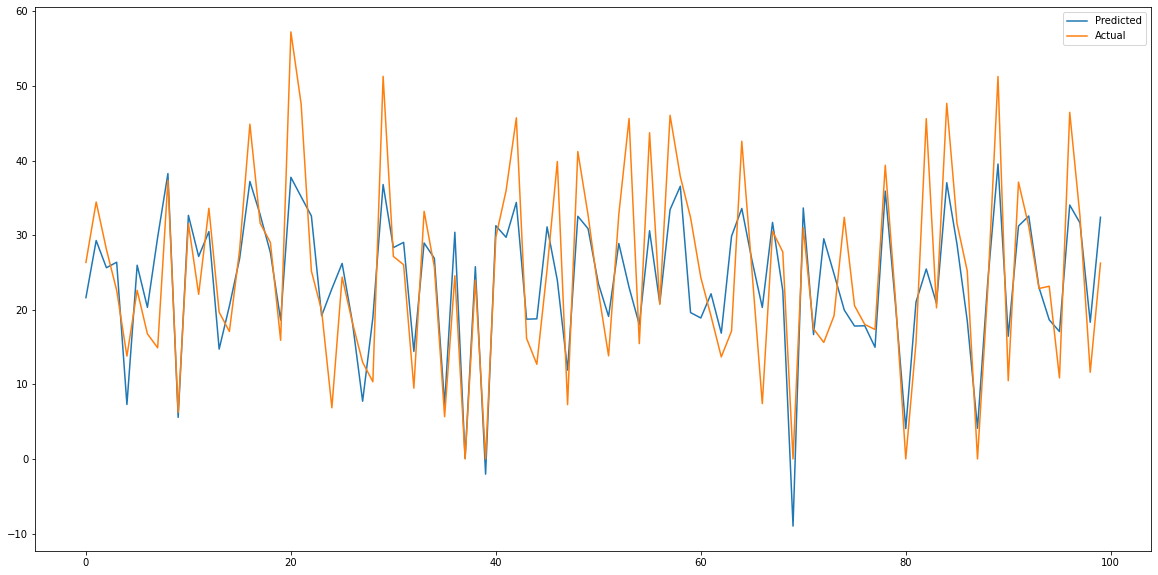

In [ ]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

# Polynomial Regression

In [ ]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

MSE : 119046.85241614899
RMSE : 345.03166871484274
R2 : 0.7119536285367192
Adjusted R2 :  0.7091296445027655


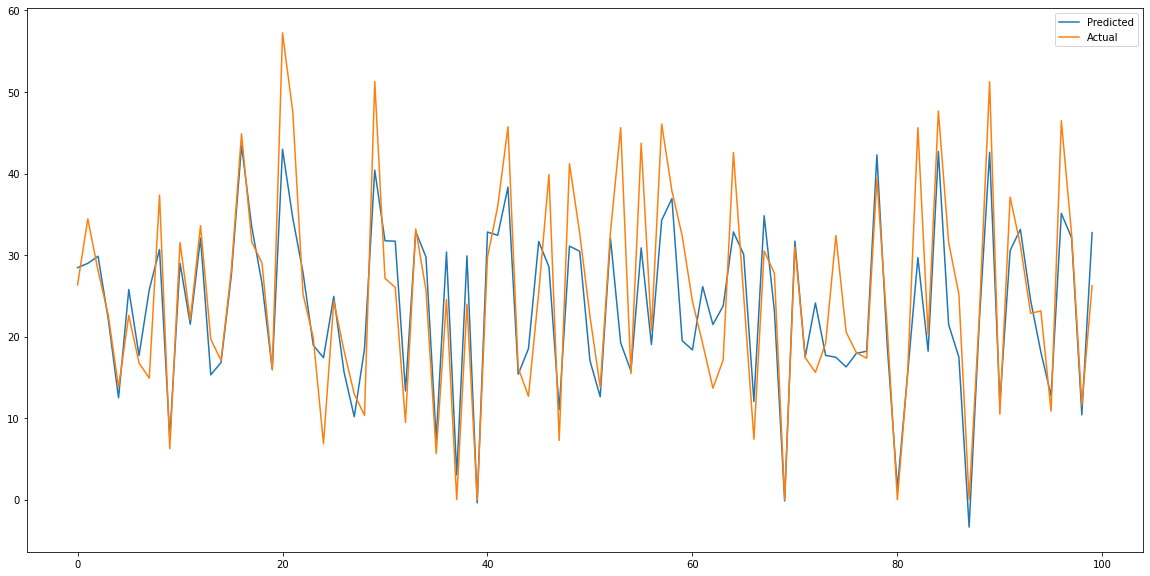

In [ ]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

# Decision Tree Regression

In [ ]:
#creating X for independent variable
X=df.drop(['Rented Bike Count'],axis=1)

In [ ]:
#creating y for dependent variable
y=df['Rented Bike Count']

In [ ]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

MSE : 98242.19006849315
RMSE : 313.43610205031126
R2 : 0.7652643064468493
Adjusted R2 :  0.7629629761178969


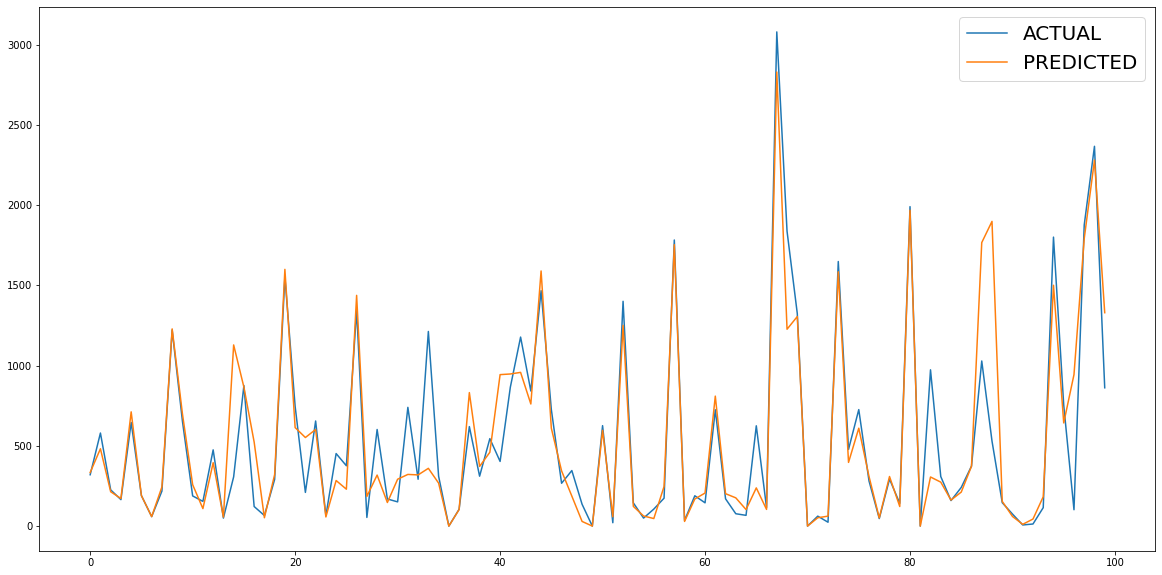

In [ ]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

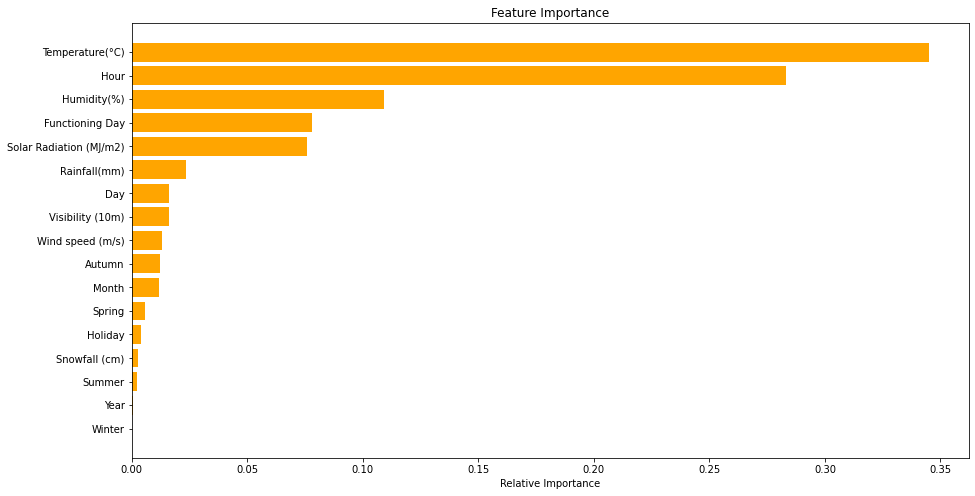

In [ ]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

# Random Forest

In [ ]:
#creating model of random forest
rf_model = RandomForestRegressor()


In [ ]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)

MSE : 63304.526293853916
RMSE : 251.60390754885728
R2 : 0.8487428682699216
Adjusted R2 :  0.8472599552137444


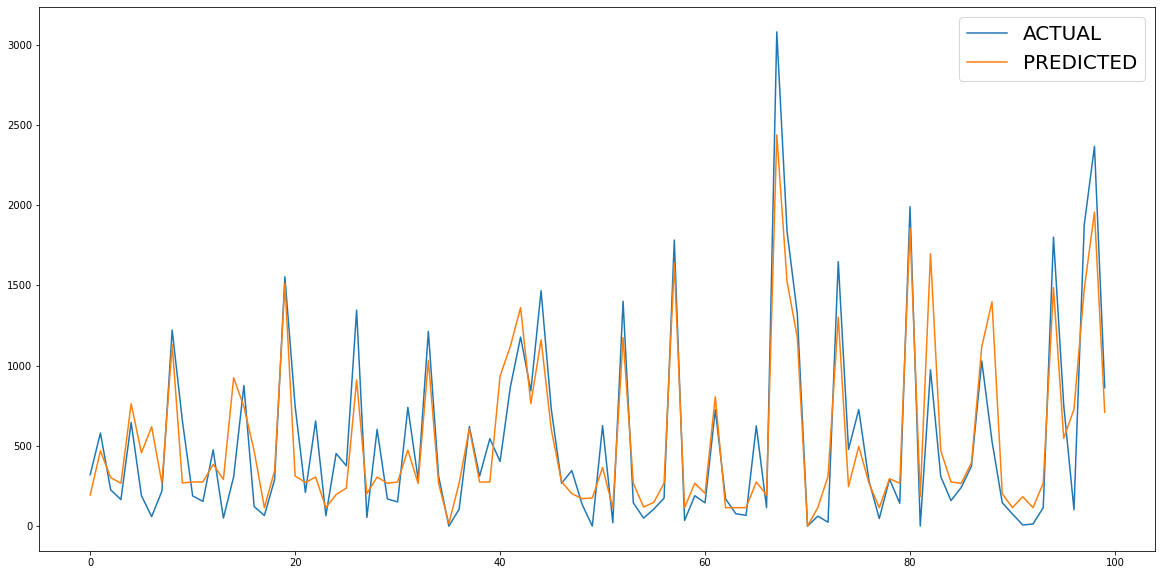

In [ ]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [ ]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

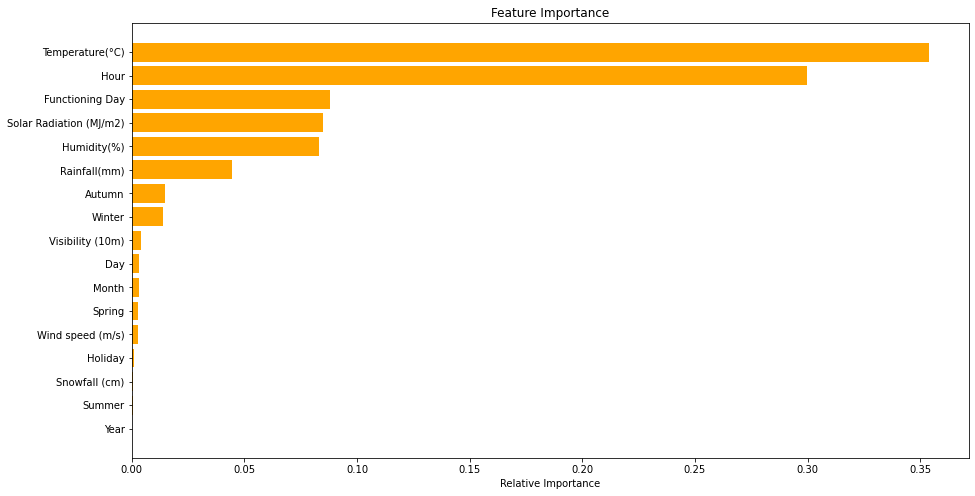

In [ ]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

# Gradient Boosting

In [ ]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)

In [ ]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [90]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

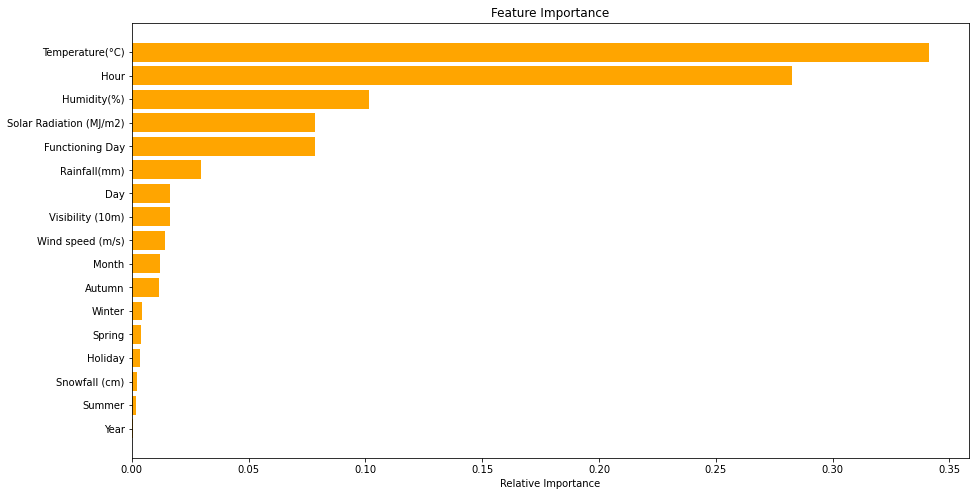

In [91]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

# **Final Conclusion:**

1.In holiday or non-working days there is demands in rented bikes.

2.There is a surge of high demand in the morning 8AM and in evening 6PM
as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

3.People prefered more rented bikes in the morning than the evening.

4.When the rainfall was less, people have booked more bikes except some few cases.

5.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

6.After performing the various models the Random Forest and Gradient Boosting found to be the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the Random Forest and Gradient Boosting model.

7.R2 value for Random Forest and Gradient Boosting are 0.851 and 0.855 respectively.

8.We can use either Random Forest or Gradient Boosting model for the bike rental stations.